Total points for this HW: 100.
Due date: 02/20/2020 (at the start of class)

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

Interpretability is very important in Criminology in order to identify crime characteristics. Decision trees could be very efficient at predicting crime as they emphasize on the 'why' a dataset is making a certain prediction rather than 'what' is predicted. In criminology, decision trees allow to visualize and understand which attributes can explain crimes as it is very important to understand the features and variables that define criminality. Using random forest might yield better accuracy in terms of predictability. However, it does not allow to identify which attributes are the most important in predicting crime unlike decision trees.

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

Accuracy can be more important than interpretability in problems where the predicted value matters more than the variables explaining it. An urban example of random forest would be predicting traffic congestion before it happens in order to control traffic signals accordingly on the intersections susceptible to experiencing heavy traffic. Random forest can in this case predict the intersections that are the most likely to undergo traffic based on historical data which can include time of the day, day of the week, traffic signals duration, intersections etc. 
In this case, the accuracy in the prediction is more important than understanding the factors that lead to traffic congestion because RF would be used as a preventive model to predict traffic beforehand in order for cities to better plan on the managing it.


c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

Answer based on the following litterature: https://arxiv.org/pdf/1606.05390.pdf
This research focuses on developing a post-processing method, which can improve the interpretability of random forest. This method involves approximating the ensemble decision trees using a simpler and more interpretable model, which is derived from the Expectation-Maximization (EM) Algorithm to minimize the Kullback–Leibler divergence from the random forest, which measures how different a probability distribution is from another. 
The main objectives of the research consisted of trying to minimize model error while reducing the number of regions of the input space in the random forest. This was achieved by developing two separate models where one that focuses on prediction and accuracy, and the second on interpretability by choosing simple rules with significant predictive power. The difficulty to intepret random forest stems from the fact that the input space gets divided into several regions sometimes reaching thousands, which can be impossible to visualize and interpret. This research is based on the assumption that a random forest model is interpretable if the input space is divided into a small number of regions. Therefore, this post-processing approach utilizes this assumption to develop another ensemble trees model as an approximation of the original random forest using a smaller number of regions to divide the input space. The EM algorithm allows to train the second model for interpretability using KL divergence and treats the number of regions to be divided as a hyper-parameter. Overall, the method was able to improve the model's interpretability by using simple rules with high predictive impact, which also helped preserve the accuracy of the model.

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [69]:
import pandas as pd
import numpy as np

In [113]:
from io import StringIO
thefile = StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df.head()

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium


In [71]:
df.sort_values(by = 'HP', ascending = True, inplace = True)

### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [72]:
print('The most common MPG value is: {}'.format(df.MPG.value_counts().index[0]))

The most common MPG value is: bad


In [73]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [74]:
dico = {}

cylinders = [4,6,8]
MPG = ['good','bad']
weight = ['light', 'medium', 'weighty']

for val in MPG:
    for cyl in cylinders:
        dico[str(cyl) + '_' + val] = len(df[(df.MPG == val) & (df.cylinders == cyl)])
        dico[str(cyl) + '_else_' + val] = len(df[(df.MPG == val) & (df.cylinders != cyl)])
    for w in weight:
        dico[str(w) + '_' + val] = len(df[(df.MPG == val) & (df.weight == w)])
        dico[str(w) + '_else_' + val] = len(df[(df.MPG == val) & (df.weight != w)])
        
dico   

{'4_good': 5,
 '4_else_good': 0,
 '6_good': 0,
 '6_else_good': 5,
 '8_good': 0,
 '8_else_good': 5,
 'light_good': 3,
 'light_else_good': 2,
 'medium_good': 2,
 'medium_else_good': 3,
 'weighty_good': 0,
 'weighty_else_good': 5,
 '4_bad': 4,
 '4_else_bad': 11,
 '6_bad': 6,
 '6_else_bad': 9,
 '8_bad': 5,
 '8_else_bad': 10,
 'light_bad': 3,
 'light_else_bad': 12,
 'medium_bad': 6,
 'medium_else_bad': 9,
 'weighty_bad': 6,
 'weighty_else_bad': 9}

In [75]:
value = ['4','6','8','light','medium','weighty']
IG = {}

for j in value:
    IG[j] = InformationGain(dico[j+'_good'], dico[j+'_bad'], dico[j+'_else_good'], dico[j+'_else_bad'])
print('The Information Gains are:')
IG

The Information Gains are:


{'4': 0.3652938975319328,
 '6': 0.15307795338969116,
 '8': 0.1225562489182657,
 'light': 0.09710717945150363,
 'medium': 0.0,
 'weighty': 0.15307795338969116}

c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [76]:
HP = df.loc[:,('MPG','HP')]
HP.sort_values(by = 'HP', ascending = True, inplace = True)
HP.reset_index(inplace = True, drop = True)
HP

,MPG,HP
0,good,65
1,good,75
2,good,81
3,bad,85
4,good,89
5,bad,90
6,good,92
7,bad,93
8,bad,94
9,bad,95


In [114]:
midp = []

for i in range(HP.shape[0]):  
    try:
        if HP.MPG.iloc[i] != HP.MPG.iloc[i+1]:
            midp.append((HP.HP.iloc[i]+HP.HP.iloc[i+1])/2)       
    except:
        break

print('The midpoints are: {}'.format(midp))

The midpoints are: [83.0, 87.0, 89.5, 91.0, 92.5]


In [78]:
dico_HP = {}

for m in midp: 
    dico_HP[str(m) + '_' + 'good'] = len(HP[(HP.MPG == 'good') & (HP.HP > m)])
    dico_HP[str(m) + '_' + 'bad'] = len(HP[(HP.MPG == 'bad') & (HP.HP > m)])
    dico_HP[str(m) + '_else_' + 'good'] = len(HP[(HP.MPG == 'good') & (HP.HP <= m)])
    dico_HP[str(m) + '_else_' + 'bad'] = len(HP[(HP.MPG == 'bad') & (HP.HP <= m)])

dico_HP

{'83.0_good': 2,
 '83.0_bad': 15,
 '83.0_else_good': 3,
 '83.0_else_bad': 0,
 '87.0_good': 2,
 '87.0_bad': 14,
 '87.0_else_good': 3,
 '87.0_else_bad': 1,
 '89.5_good': 1,
 '89.5_bad': 14,
 '89.5_else_good': 4,
 '89.5_else_bad': 1,
 '91.0_good': 1,
 '91.0_bad': 13,
 '91.0_else_good': 4,
 '91.0_else_bad': 2,
 '92.5_good': 0,
 '92.5_bad': 13,
 '92.5_else_good': 5,
 '92.5_else_bad': 2}

In [79]:
IG_HP = {}

for i in midp:
    IG_HP[i] = InformationGain(dico_HP[str(i)+'_good'], dico_HP[str(i)+'_bad'], dico_HP[str(i)+'_else_good'], dico_HP[str(i)+'_else_bad'])

print('The Information Gains for HP are:')
IG_HP 

The Information Gains for HP are:


{83.0: 0.36710265610273324,
 87.0: 0.21417094500762923,
 89.5: 0.36577659947122626,
 91.0: 0.2759267455941731,
 92.5: 0.5091859254608121}

d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

In [80]:
IG.update(IG_HP)
print('The Information Gains are:')
IG

The Information Gains are:


{'4': 0.3652938975319328,
 '6': 0.15307795338969116,
 '8': 0.1225562489182657,
 'light': 0.09710717945150363,
 'medium': 0.0,
 'weighty': 0.15307795338969116,
 83.0: 0.36710265610273324,
 87.0: 0.21417094500762923,
 89.5: 0.36577659947122626,
 91.0: 0.2759267455941731,
 92.5: 0.5091859254608121}

In [81]:
print('The optimal binary split of the data is at {}'.format(max(IG, key=IG.get)))

The optimal binary split of the data is at 92.5


e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [82]:
HP_new = df[df.HP<92.5]
HP_new

,MPG,cylinders,HP,weight
15,good,4,65,light
0,good,4,75,light
17,good,4,81,light
16,bad,6,85,medium
14,good,4,89,medium
1,bad,6,90,medium
11,good,4,92,medium


In [107]:
print('The most common MPG value is: {}'.format(HP_new.MPG.value_counts().index[0]))


The most common MPG value is: good


In [84]:
dico2 = {}

cylinders = [4,6,8]
MPG = ['good','bad']
weight = ['light', 'medium', 'weighty']

for val in MPG:
    for cyl in cylinders:
        dico2[str(cyl) + '_' + val] = len(HP_new[(HP_new.MPG == val) & (HP_new.cylinders == cyl)])
        dico2[str(cyl) + '_else_' + val] = len(HP_new[(HP_new.MPG == val) & (HP_new.cylinders != cyl)])
    for w in weight:
        dico2[str(w) + '_' + val] = len(HP_new[(HP_new.MPG == val) & (HP_new.weight == w)])
        dico2[str(w) + '_else_' + val] = len(HP_new[(HP_new.MPG == val) & (HP_new.weight != w)])
        
dico2   

{'4_good': 5,
 '4_else_good': 0,
 '6_good': 0,
 '6_else_good': 5,
 '8_good': 0,
 '8_else_good': 5,
 'light_good': 3,
 'light_else_good': 2,
 'medium_good': 2,
 'medium_else_good': 3,
 'weighty_good': 0,
 'weighty_else_good': 5,
 '4_bad': 0,
 '4_else_bad': 2,
 '6_bad': 2,
 '6_else_bad': 0,
 '8_bad': 0,
 '8_else_bad': 2,
 'light_bad': 0,
 'light_else_bad': 2,
 'medium_bad': 2,
 'medium_else_bad': 0,
 'weighty_bad': 0,
 'weighty_else_bad': 2}

In [85]:
value = ['4','6','8','light','medium','weighty']
IG2 = {}

for j in value:
    IG2[j] = InformationGain(dico2[j+'_good'], dico2[j+'_bad'], dico2[j+'_else_good'], dico2[j+'_else_bad'])
IG2

{'4': 0.8631205685666309,
 '6': 0.8631205685666309,
 '8': 0.0,
 'light': 0.2916919971380595,
 'medium': 0.2916919971380595,
 'weighty': 0.0}

In [86]:
HP2 = HP_new.loc[:,('MPG','HP')]
HP2.sort_values(by = 'HP', ascending=True, inplace = True)
HP2.reset_index(inplace=True, drop=True)
HP2

,MPG,HP
0,good,65
1,good,75
2,good,81
3,bad,85
4,good,89
5,bad,90
6,good,92


In [115]:
midp2 = []

for i in range(HP2.shape[0]):  
    try:
        if HP2.MPG.iloc[i] != HP2.MPG.iloc[i+1]:
            midp2.append((HP2.HP.iloc[i]+HP2.HP.iloc[i+1])/2)       
    except:
        break

print('The midpoints are: {}'.format(midp2))

The midpoints are: [83.0, 87.0, 89.5, 91.0]


In [88]:
dico_HP2 = {}

for m in midp2: 
    dico_HP2[str(m) + '_' + 'good'] = len(HP2[(HP2.MPG == 'good') & (HP2.HP > m)])
    dico_HP2[str(m) + '_' + 'bad'] = len(HP2[(HP2.MPG == 'bad') & (HP2.HP > m)])
    dico_HP2[str(m) + '_else_' + 'good'] = len(HP2[(HP2.MPG == 'good') & (HP2.HP <= m)])
    dico_HP2[str(m) + '_else_' + 'bad'] = len(HP2[(HP2.MPG == 'bad') & (HP2.HP <= m)])

dico_HP2

{'83.0_good': 2,
 '83.0_bad': 2,
 '83.0_else_good': 3,
 '83.0_else_bad': 0,
 '87.0_good': 2,
 '87.0_bad': 1,
 '87.0_else_good': 3,
 '87.0_else_bad': 1,
 '89.5_good': 1,
 '89.5_bad': 1,
 '89.5_else_good': 4,
 '89.5_else_bad': 1,
 '91.0_good': 1,
 '91.0_bad': 0,
 '91.0_else_good': 4,
 '91.0_else_bad': 2}

In [89]:
IG_HP2 = {}

for i in midp2:
    IG_HP2[i] = InformationGain(dico_HP2[str(i)+'_good'], dico_HP2[str(i)+'_bad'], dico_HP2[str(i)+'_else_good'], dico_HP2[str(i)+'_else_bad'])
IG_HP2 

{83.0: 0.2916919971380595,
 87.0: 0.005977711423773854,
 89.5: 0.06174335793280074,
 91.0: 0.07600985366278287}

In [90]:
IG2.update(IG_HP2)
print('The Information Gains are:')
IG2

The Information Gains are:


{'4': 0.8631205685666309,
 '6': 0.8631205685666309,
 '8': 0.0,
 'light': 0.2916919971380595,
 'medium': 0.2916919971380595,
 'weighty': 0.0,
 83.0: 0.2916919971380595,
 87.0: 0.005977711423773854,
 89.5: 0.06174335793280074,
 91.0: 0.07600985366278287}

In [108]:
print('The optimal binary split of the data is at {}'.format(max(IG2, key = IG2.get)))

The optimal binary split of the data is at 4


f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

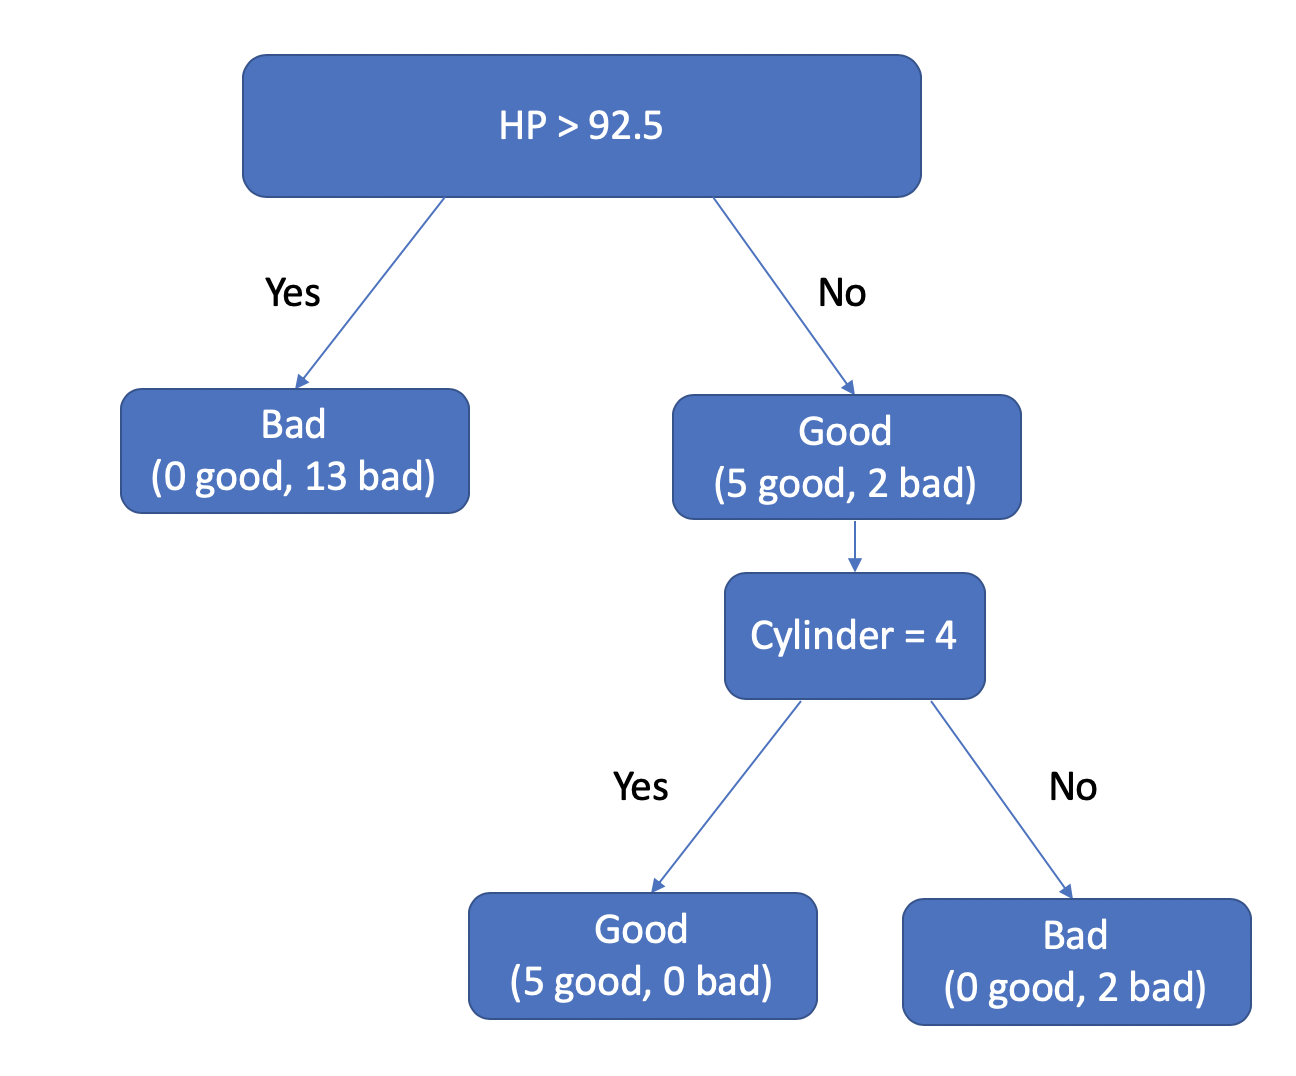

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

'good',4,70,light

'bad',6,113,medium

'bad',6,83,weighty

'bad',4,95,weighty


### Question 3, Predicting burden of disease （40 pts)

In [92]:
data = pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [94]:
data = data.dropna()
data.head()

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high
3,Angola,0.2,0.63,14009,0.39604,0.69307,0.158420,0.55446,0.028,0.842,0.0670,22,1942,0.66139,0.53267,awful
4,Armenia,1.0,2.51,2780,0.79208,0.98020,0.603960,0.95050,0.060,0.202,0.1720,11,5697,0.97624,0.97030,low


In [95]:
data.shape

(130, 16)

In [96]:
y = data.BurdenOfDisease
X = data.iloc[:,1:-1]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 383)
print(X_train.head())

     FrxnPeaceIn10  ODA4H2OPcptaDol  RenewResm3PcptaYr  SustAccImprWatRur  \
19             0.0             1.02                566            0.77228   
56             1.0             0.00              10433            0.97030   
11             1.0             3.09               3954            0.59406   
5              1.0             0.00              25708            0.99010   
107            0.0             0.14               2074            0.63366   

     SustAccImprWatUrb  SustAccImprSanRur  SustAccImprSanUrb  \
19             0.89109            0.34653            0.46535   
56             0.99010            0.84158            0.99010   
11             0.78218            0.11881            0.57426   
5              0.99010            0.99010            0.99010   
107            0.77228            0.23762            0.49505   

     TotHlthExpPctofGDP  GenGovtPctofTotHlthExp  ExtResHlthPctTotExpHlth  \
19                0.031                   0.233                   0.1410   


In [122]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

# in sample accuracy
print('The in sample accuracy is:', dt.score(X_train,y_train))

# out of sample accuracy
print('The out of sample accuracy is:', dt.score(X_test,y_test))

The in sample accuracy is: 1.0
The out of sample accuracy is: 0.5384615384615384


In [123]:
OS_acc = []
for i in range(1,11):
    dt = DecisionTreeClassifier(max_depth = i)
    dt.fit(X_train,y_train)
    OS_acc.append(dt.score(X_test,y_test))
    print('The out of sample accuracy score with max depth = {} is: '.format(i), dt.score(X_test,y_test))

The out of sample accuracy score with max depth = 1 is:  0.4358974358974359
The out of sample accuracy score with max depth = 2 is:  0.41025641025641024
The out of sample accuracy score with max depth = 3 is:  0.5384615384615384
The out of sample accuracy score with max depth = 4 is:  0.5128205128205128
The out of sample accuracy score with max depth = 5 is:  0.5128205128205128
The out of sample accuracy score with max depth = 6 is:  0.5128205128205128
The out of sample accuracy score with max depth = 7 is:  0.5128205128205128
The out of sample accuracy score with max depth = 8 is:  0.5384615384615384
The out of sample accuracy score with max depth = 9 is:  0.5128205128205128
The out of sample accuracy score with max depth = 10 is:  0.5128205128205128


b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

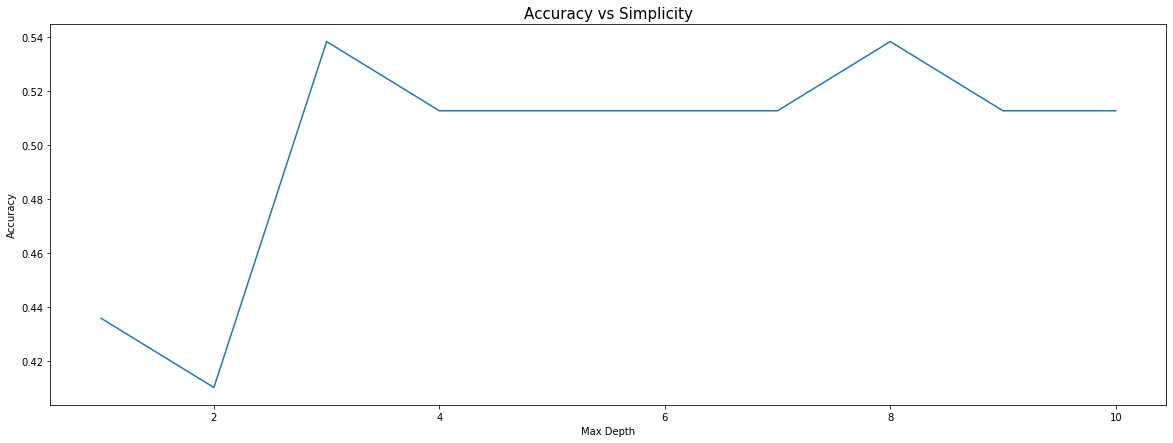

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,7))
plt.plot(range(1,11), OS_acc)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Simplicity', size = 15)
plt.show()


c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [128]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': range(1, 20)}
gr = GridSearchCV(dt, parameters, cv = 5, verbose = 1)
gr.fit(X_train, y_train)

print(gr.best_params_)
print(gr.best_score_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'max_depth': 4}
0.7472527472527473


[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    0.3s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [129]:
print('The out of sample accuracy score with max depth = {} is:'.format(gr.best_params_['max_depth']),gr.score(X_test, y_test))

The out of sample accuracy score with max depth = 4 is: 0.5128205128205128


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

In [103]:
from sklearn import tree

dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [104]:
thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print(thestring)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="FemaleLtrcyRate <= 0.778, samples = 91, value = [23, 23, 24, 21], class = low", fillcolor="#fcfeff"] ;
1 [label="SustAccImprSanUrb <= 0.634, samples = 46, value = [23, 19, 0, 4], class = awful", fillcolor="#fbece2"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="ExtResHlthPctTotExpHlth <= 0.025, samples = 28, value = [22, 6, 0, 0], class = awful", fillcolor="#eca36f"] ;
1 -> 2 ;
3 [label="samples = 3, value = [0, 3, 0, 0], class = high", fillcolor="#47e539"] ;
2 -> 3 ;
4 [label="samples = 25, value = [22, 3, 0, 0], class = awful", fillcolor="#e99254"] ;
2 -> 4 ;
5 [label="ExtResHlthPctTotExpHlth <= 0.017, samples = 18, value = [1, 13, 0, 4], class = high", fillcolor="#89ee80"] ;
1 -> 5 ;
6 [label="samples = 5, value = [0, 1, 0, 4], class = medium", fillcolor="#e16aec"] ;
5 -> 6 ;
7 [label="samples = 13, value = [1, 12, 0, 0], cla

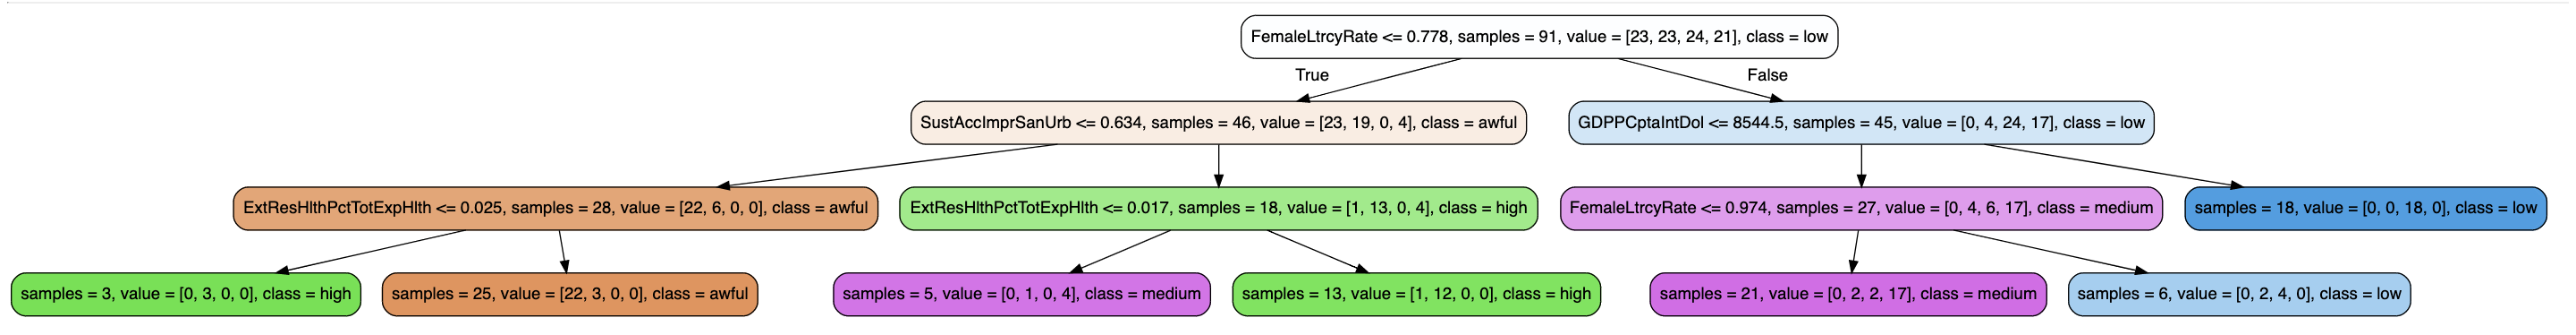

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print('The in sample accuracy is:', rf.score(X_train, y_train))
print('The out of sample accuracy is:', rf.score(X_test, y_test))

The in sample accuracy is: 1.0
The out of sample accuracy is: 0.6410256410256411


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [121]:
param = {'max_depth': range(1, 20)}
gr_rf = GridSearchCV(rf, param, cv = 5, verbose = 1)
gr_rf.fit(X_train, y_train)

print('The out of sample accuracy is:', gr_rf.score(X_test, y_test))

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The out of sample accuracy is: 0.5897435897435898


[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    1.3s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [135]:
gr_rf.best_params_

{'max_depth': 8}

### After tuning the hyper-parameters, Random Forest was able to yield a higher out of sample accuracy score than decision trees while reducing overfitting.

b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

In terms of Accuracy, the Decision Tree algorithm yielded an out of sample accuracy score of 0.51, while Random Forest was able to produce a higher score of 0.58. This is mainly due to the fact that Random Forest averages over multiple trees, which improve accuracy and stability as some trees might lead better accuracy than others depending on the parameters chosen. After tuning the hyperparameters, the most optimal parameter was achieved with max_depth=8.
However, when it comes to Interpretability, the structure of the decision tree algorithm is simple as it produced only one tree compared to random forest, which produces many. It was easy to visualize one decision tree and understand which attributes were having the highest impact on predicting the target variable 'BurdenOfDisease' as the ones that were on higher nodes were better decision rules. In the case where max_depth=3; 'SustAccImprSanUrb' and 'GDPPCptaIntDol' turned out to be the attributes that produced the highest information gain, which means that they separate/split the data the best. Nonetheless, with Random Forest it is possible to visualize only one tree at a time instead of the whole forest of trees, which makes overall interpretability harder to achieve than with decision trees.